# Plot boxplots

In [1]:
#library(repr)
library(ggpubr)
library(ggsignif)
library(tidyverse)

Loading required package: ggplot2

-- Attaching packages ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.2     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



## Functions

In [2]:
add_symnum <- function(res){
    symnum.args <- list(cutpoints = c(0, 0.0001, 0.001, 0.01, 0.05,  1),
                        symbols = c("****", "***", "**", "*",  "ns"))
    symnum.args$x <- res$adj.P.Val
    pvalue.signif <- do.call(stats::symnum, symnum.args) %>%
    as.character()
    pvalue.format <- format.pval(res$adj.P.Val, digits = 2)
    res <- res %>%
    dplyr::ungroup() %>%
    mutate(FDR = pvalue.format, p.signif = pvalue.signif)
    return(res)
}


save_ggplots <- function(fn, p, w, h){
    for(ext in c('.pdf', '.png', '.svg')){
        ggsave(paste0(fn, ext), plot=p, width=w, height=h)
    }
}

## Gene annotation

### Caudate vs DLPFC

In [3]:
deg_file = '../../_m/genes/diffExpr_CvD_sex_full.txt'
deg_cd = read.delim(deg_file, row.names=1) %>% filter(Symbol %in% c("ANK3", "EML1", "PKIG")) %>% 
    select(-c(Length, Class, meanExprs, NumTx, gene_type, gencodeTx)) %>% mutate(Comparison="C_vs_D")
deg_cd = add_symnum(deg_cd)
deg_cd

,gencodeID,ensemblID,Symbol,EntrezID,logFC,AveExpr,t,P.Value,adj.P.Val,z.std,Comparison,FDR,p.signif
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ENSG00000066629.16,ENSG00000066629.16,ENSG00000066629,EML1,2009,-0.2224274,5.678977,-5.284134,1.653569e-07,0.0001412821,-5.234584,C_vs_D,0.00014,***
ENSG00000151150.21,ENSG00000151150.21,ENSG00000151150,ANK3,288,-0.1624430,9.198364,-4.222967,2.705494e-05,0.0065466526,-4.196937,C_vs_D,0.00655,**
ENSG00000168734.13,ENSG00000168734.13,ENSG00000168734,PKIG,11142,0.1179579,4.648106,2.862932,4.312617e-03,0.0871399586,2.854341,C_vs_D,0.08714,ns


### Caudate vs Hippocampus

In [4]:
deg_file = '../../_m/genes/diffExpr_CvH_sex_full.txt'
deg_ch = read.delim(deg_file, row.names=1) %>% filter(Symbol %in% c("ANK3", "EML1", "PKIG")) %>% 
    select(-c(Length, Class, meanExprs, NumTx, gene_type, gencodeTx)) %>% mutate(Comparison="C_vs_H")
deg_ch = add_symnum(deg_ch)
deg_ch

,gencodeID,ensemblID,Symbol,EntrezID,logFC,AveExpr,t,P.Value,adj.P.Val,z.std,Comparison,FDR,p.signif
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ENSG00000066629.16,ENSG00000066629.16,ENSG00000066629,EML1,2009,-0.21342199,5.678977,-5.132493,3.683372e-07,0.000883507,-5.084633,C_vs_H,0.00088,***
ENSG00000151150.21,ENSG00000151150.21,ENSG00000151150,ANK3,288,-0.11468306,9.198364,-3.049084,2.378715e-03,0.311608309,-3.038358,C_vs_H,0.31161,ns
ENSG00000168734.13,ENSG00000168734.13,ENSG00000168734,PKIG,11142,-0.06000849,4.648106,-1.455761,1.458925e-01,0.797632415,-1.454194,C_vs_H,0.79763,ns


### DLPFC vs Hippocampus

In [5]:
deg_file = '../../_m/genes/diffExpr_DvH_sex_full.txt'
deg_dh = read.delim(deg_file, row.names=1) %>% filter(Symbol %in% c("ANK3", "EML1", "PKIG")) %>% 
    select(-c(Length, Class, meanExprs, NumTx, gene_type, gencodeTx)) %>% mutate(Comparison="D_vs_H")
deg_dh = add_symnum(deg_dh)
deg_dh

,gencodeID,ensemblID,Symbol,EntrezID,logFC,AveExpr,t,P.Value,adj.P.Val,z.std,Comparison,FDR,p.signif
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ENSG00000168734.13,ENSG00000168734.13,ENSG00000168734,PKIG,11142,0.177966401,4.648106,4.2331362,2.597223e-05,0.02979466,4.2061810,D_vs_H,0.03,*
ENSG00000151150.21,ENSG00000151150.21,ENSG00000151150,ANK3,288,-0.047759991,9.198364,-1.2436932,2.140084e-01,0.65697775,-1.2426187,D_vs_H,0.66,ns
ENSG00000066629.16,ENSG00000066629.16,ENSG00000066629,EML1,2009,-0.009005439,5.678977,-0.2115256,8.325364e-01,0.96129152,-0.2114497,D_vs_H,0.96,ns


### Merge gene annotation

In [6]:
gene_annot = rbind(deg_cd, deg_ch, deg_dh)
gene_annot

,gencodeID,ensemblID,Symbol,EntrezID,logFC,AveExpr,t,P.Value,adj.P.Val,z.std,Comparison,FDR,p.signif
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ENSG00000066629.16,ENSG00000066629.16,ENSG00000066629,EML1,2009,-0.222427425,5.678977,-5.2841344,1.653569e-07,0.0001412821,-5.2345840,C_vs_D,0.00014,***
ENSG00000151150.21,ENSG00000151150.21,ENSG00000151150,ANK3,288,-0.162443046,9.198364,-4.2229670,2.705494e-05,0.0065466526,-4.1969368,C_vs_D,0.00655,**
ENSG00000168734.13,ENSG00000168734.13,ENSG00000168734,PKIG,11142,0.117957906,4.648106,2.8629322,4.312617e-03,0.0871399586,2.8543413,C_vs_D,0.08714,ns
ENSG00000066629.161,ENSG00000066629.16,ENSG00000066629,EML1,2009,-0.213421986,5.678977,-5.1324932,3.683372e-07,0.0008835070,-5.0846332,C_vs_H,0.00088,***
ENSG00000151150.211,ENSG00000151150.21,ENSG00000151150,ANK3,288,-0.114683055,9.198364,-3.0490843,2.378715e-03,0.3116083088,-3.0383577,C_vs_H,0.31161,ns
ENSG00000168734.131,ENSG00000168734.13,ENSG00000168734,PKIG,11142,-0.060008495,4.648106,-1.4557609,1.458925e-01,0.7976324153,-1.4541940,C_vs_H,0.79763,ns
ENSG00000168734.132,ENSG00000168734.13,ENSG00000168734,PKIG,11142,0.177966401,4.648106,4.2331362,2.597223e-05,0.0297946618,4.2061810,D_vs_H,0.03,*
ENSG00000151150.212,ENSG00000151150.21,ENSG00000151150,ANK3,288,-0.047759991,9.198364,-1.2436932,2.140084e-01,0.6569777485,-1.2426187,D_vs_H,0.66,ns
ENSG00000066629.162,ENSG00000066629.16,ENSG00000066629,EML1,2009,-0.009005439,5.678977,-0.2115256,8.325364e-01,0.9612915244,-0.2114497,D_vs_H,0.96,ns


## Load residualized data

In [7]:
res_file = '../../_m/genes/residualized_expression.tsv'
resdf0 = data.table::fread(res_file) %>% 
    filter(Geneid %in% gene_annot$gencodeID) %>% 
    column_to_rownames("Geneid") %>% t %>% data.frame
resdf0 %>% head(2)

,ENSG00000151150.21,ENSG00000066629.16,ENSG00000168734.13
,<dbl>,<dbl>,<dbl>
R10424,0.1373256,-0.5566796,0.52761320
R12195,0.0542371,-0.3045881,0.07979308


## Load phenotype data

In [9]:
pheno_file = '/ceph/projects/v4_phase3_paper/inputs/phenotypes/_m/merged_phenotypes.csv'
pheno = read.csv(pheno_file, row.names=1) %>% 
    mutate_if(is.character, as.factor) 
head(pheno, 2)

,Sex,Race,Dx,Age,mitoRate,rRNA_rate,totalAssignedGene,RIN,ERCCsumLogErr,overallMapRate,snpPC1,snpPC2,snpPC3,snpPC4,snpPC5,Region,BrNum,antipsychotics,lifetime_antipsych,Protocol
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<lgl>,<lgl>,<fct>
R11135,Male,EA,CTL,18.77,0.2572796,0.0001690954,0.5231321,5.9,-22.04979,0.8746,-0.0361629,0.00323170,0.000562337,0.00172510,-0.000806549,HIPPO,Br2063,FALSE,FALSE,RiboZeroHMR
R11137,Male,EA,CTL,41.44,0.3840272,0.0000884558,0.5933431,9.2,-29.49833,0.9149,-0.0359851,0.00353948,-0.000169571,-0.00133045,0.002002530,HIPPO,Br2582,FALSE,FALSE,RiboZeroHMR


## Merge dataframe

In [10]:
resdf <- inner_join(rownames_to_column(pheno), 
                    rownames_to_column(resdf0), 
                    by="rowname")
dim(resdf)
resdf[1:2, 1:11]

[1] 1127   24

,rowname,Sex,Race,Dx,Age,mitoRate,rRNA_rate,totalAssignedGene,RIN,ERCCsumLogErr,overallMapRate
,<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,R11135,Male,EA,CTL,18.77,0.2572796,0.0001690954,0.5231321,5.9,-22.04979,0.8746
2,R11137,Male,EA,CTL,41.44,0.3840272,0.0000884558,0.5933431,9.2,-29.49833,0.9149


## Melt data frame

In [11]:
df = resdf %>% select(c('rowname', 'Sex', "Region", starts_with('ENSG'))) %>%
    pivot_longer(-c(rowname, Sex, Region), names_to = "gencodeID", values_to = "Res") %>%
    inner_join(gene_annot, by='gencodeID') %>% 
    select(rowname, Sex, Region, gencodeID, Res, Symbol) %>% distinct %>%
    mutate_at(vars("Symbol", "Region", "gencodeID", "Sex"), as.factor)
levels(df$Sex) <- c("Female", "Male")
levels(df$Region) <- c("Caudate", "DLPFC", "Hippocampus")
head(df, 3)

rowname,Sex,Region,gencodeID,Res,Symbol
<chr>,<fct>,<fct>,<fct>,<dbl>,<fct>
R11135,Male,Hippocampus,ENSG00000151150.21,-0.1901582,ANK3
R11135,Male,Hippocampus,ENSG00000066629.16,-0.2084132,EML1
R11135,Male,Hippocampus,ENSG00000168734.13,-0.5161214,PKIG


### Initial ggplot with ggpubr

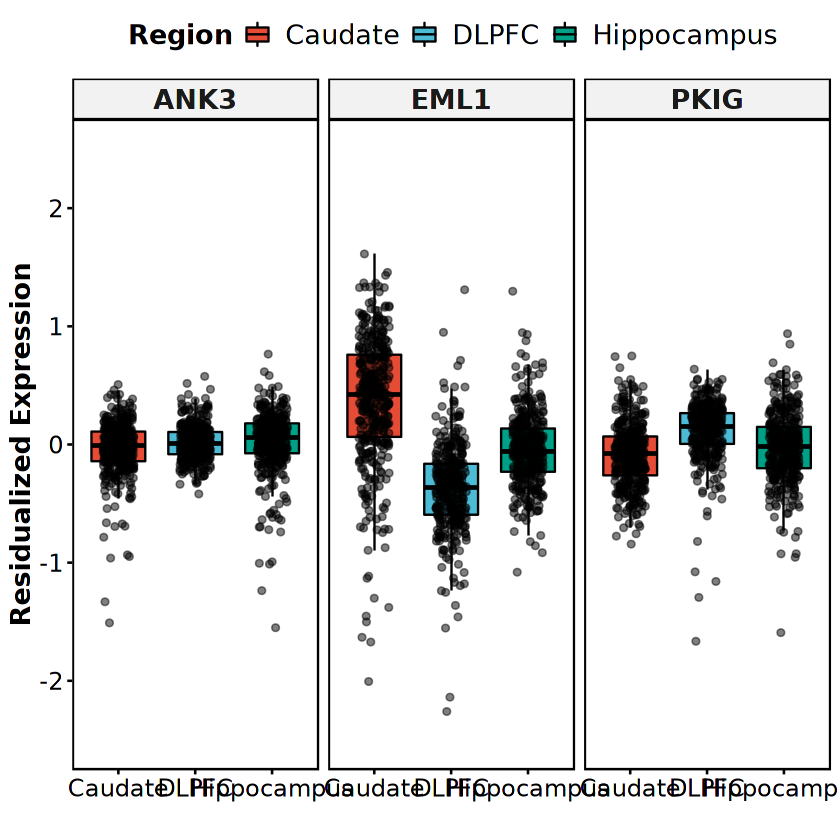

In [12]:
tmp = gene_annot %>% mutate(group1='Female', group2='Male', y_pos=3)

bxp_r <- ggboxplot(df, x="Region", y="Res", facet.by=c("Symbol"), ncol=4, 
                   fill="Region", xlab='', palette="npg", outlier.shape=NA,
                   panel.labs.font=list(face='bold', size = 16), 
                   ylab='Residualized Expression', add='jitter', ylim=c(-2.5, 2.5),
                  add.params=list(alpha=0.5)) +
         font("xy.title", size=16, face="bold") + font("xy.text", size=14) +
         font("legend.title", size=16, face="bold") + 
         font("legend.text", size=16)
         
bxp_r

In [13]:
save_ggplots('region_interaction_sex_byRegion', bxp_r, 12, 5)

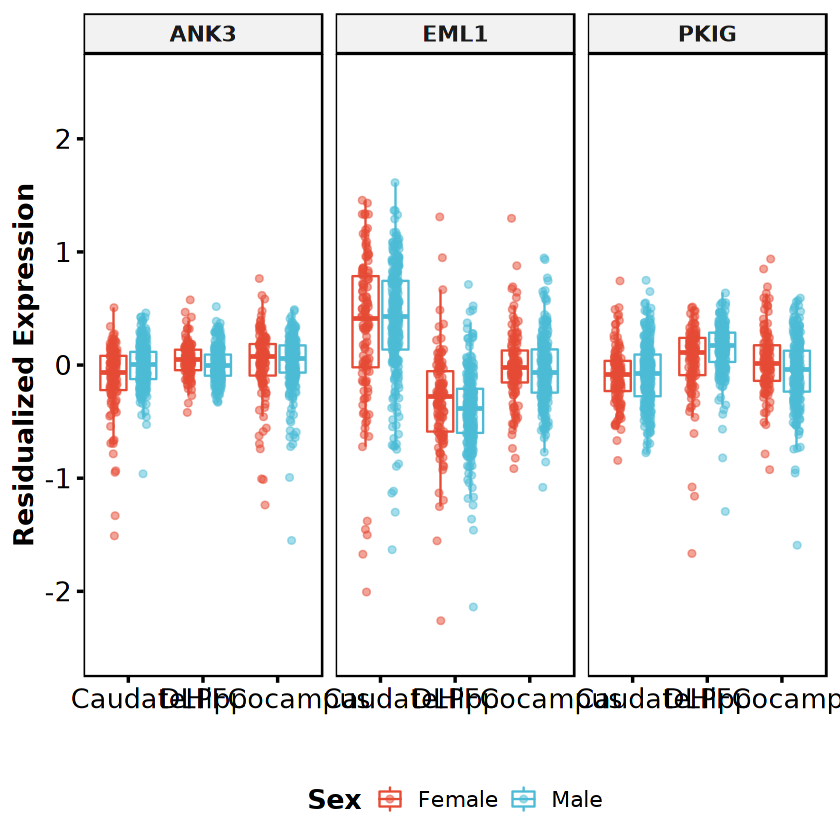

In [31]:
tmp = gene_annot %>% mutate(group1='Female', group2='Male', y_pos=3)
bxp_x <- ggboxplot(df, x="Region", y="Res", facet.by=c("Symbol"), ncol=3, 
                   color="Sex", xlab='', palette="npg", outlier.shape=NA,
                   panel.labs.font=list(face='bold'), add='jitter', 
                   ylab='Residualized Expression', ylim=c(-2.5, 2.5),
                   add.params=list(alpha=0.5), legend="bottom", 
                   ggtheme=theme_pubr(base_size=16, border=TRUE)) + 
    font("xy.title", face="bold") + font("legend.title", face="bold")
save_ggplots('region_interaction_sex_bySex', bxp_x, 12, 5)
bxp_x

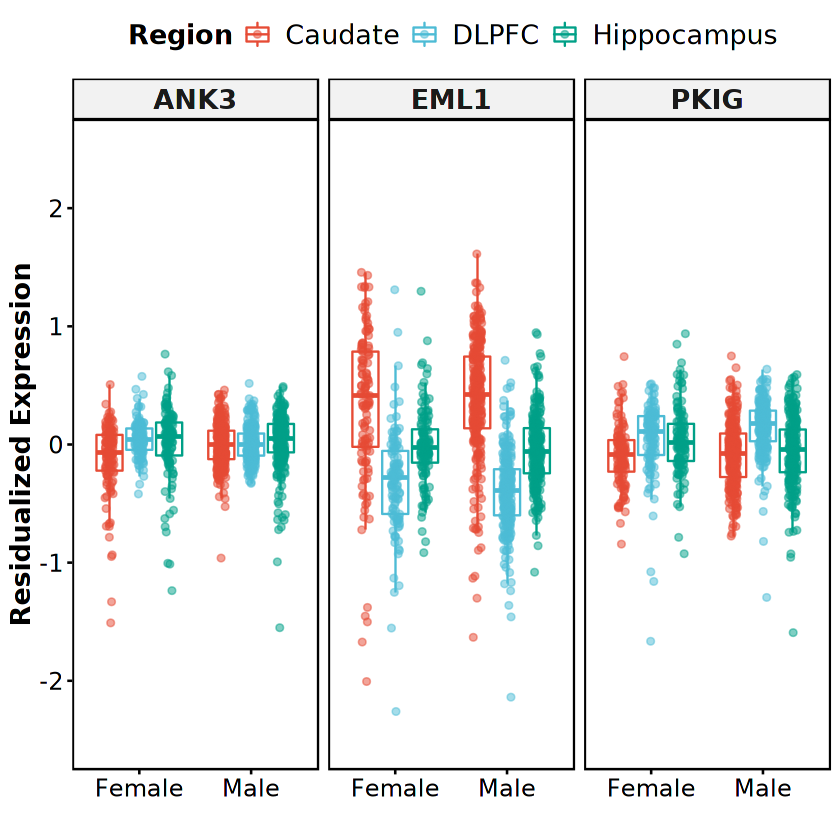

In [23]:
tmp = gene_annot %>% mutate(group1='Female', group2='Male', y_pos=3)

bxp <- ggboxplot(df, x="Sex", y="Res", facet.by=c("Symbol"), ncol=3, 
                   color="Region", xlab='', palette="npg", outlier.shape=NA,
                   panel.labs.font=list(face='bold', size = 16), 
                   ylab='Residualized Expression', add='jitter', ylim=c(-2.5, 2.5),
                  add.params=list(alpha=0.5)) +
         font("xy.title", size=16, face="bold") + font("xy.text", size=14) +
         font("legend.title", size=16, face="bold") + 
         font("legend.text", size=16)
         
bxp

In [17]:
save_ggplots('region_interaction_sex', bxp, 12, 5)

## Reproducibility information

In [ ]:
print("Reproducibility Information:")
Sys.time()
proc.time()
options(width=120)
sessioninfo::session_info()